In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
file_path = 'data_mod.csv'
data = pd.read_csv(file_path)

print(data)

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors
0    313000         3       1.50         1340      7912     1.5
1   2384000         5       2.50         3650      9050     2.0
2    342000         3       2.00         1930     11947     1.0
3    420000         3       2.25         2000      8030     1.0
4    550000         4       2.50         1940     10500     1.0
..      ...       ...        ...          ...       ...     ...
94   524000         3       1.75         1560      5520     1.0
95   541125         5       2.75         2740      8426     1.0
96   670000         3       2.50         1680      2000     3.0
97   384900         5       2.50         3090     12750     1.0
98   406100         3       2.25         1410      1332     3.0

[99 rows x 6 columns]


In [101]:
def normalize_data(a, b):
    a_mean = np.mean(a, axis=0)
    a_std = np.std(a, axis=0)
    a_norm = (a - a_mean) / a_std
    
    b_mean = np.mean(b, axis=0)
    b_std = np.std(b, axis=0)
    b_norm = (b - b_mean) / b_std
    
    return a_norm, a_mean, a_std, b_norm, b_mean, b_std

In [102]:
def gradient_descent(a, b, theta, alpha, num_iters):
    m = len(b)
    cost_history = []
    
    for i in range(num_iters):
        
        h = np.dot(a, theta)
        
        error = h - b
        
        gradient = (1 / m) * np.dot(a.T, error)
        
        theta -= alpha * gradient
        
        # Calculate cost
        cost = np.sum(error ** 2) / (2 * m)
        cost_history.append(cost)
    
    return theta, cost_history

In [103]:
a = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']].values
b = data['price'].values.reshape(-1, 1)

In [104]:
a_norm, a_mean, a_std, b_norm, b_mean, b_std = normalize_data(a, b)

In [105]:
print(a_norm)

[[-4.12765698e-01 -1.05000045e+00 -1.07279531e+00 -3.15962064e-01
   5.46766552e-02]
 [ 1.92230882e+00  5.93478516e-01  2.15873209e+00 -2.56065448e-01
   9.56841466e-01]
 [-4.12765698e-01 -2.28260968e-01 -2.47426843e-01 -1.03586981e-01
  -8.47488155e-01]
 [-4.12765698e-01  1.82608774e-01 -1.49501771e-01 -3.09751343e-01
  -8.47488155e-01]
 [ 7.54771562e-01  5.93478516e-01 -2.33437547e-01 -1.79747265e-01
  -8.47488155e-01]
 [-1.58030296e+00 -1.87173993e+00 -1.71630293e+00 -3.96596172e-01
  -8.47488155e-01]
 [-1.58030296e+00 -2.28260968e-01 -1.05880602e+00 -5.97655110e-01
  -8.47488155e-01]
 [ 7.54771562e-01  5.93478516e-01  8.43738253e-01  1.15545251e+00
   9.56841466e-01]
 [-4.12765698e-01  5.93478516e-01  4.52037962e-01  3.92174981e+00
  -8.47488155e-01]
 [ 7.54771562e-01 -2.28260968e-01 -8.20987984e-01 -4.06070153e-01
   5.46766552e-02]
 [-4.12765698e-01 -6.39130709e-01 -5.55191358e-01 -3.47120936e-01
  -8.47488155e-01]
 [ 7.54771562e-01  5.93478516e-01  1.13751347e+00 -5.21863259e-01

In [106]:
theta = np.zeros((a_norm.shape[1], 1))

In [107]:
alpha = 0.01
num_iters = 1000  

In [108]:
theta, cost_history = gradient_descent(a_norm, b_norm, theta, alpha, num_iters)

In [109]:
print("Theta (parameters):", theta)


Theta (parameters): [[ 0.16658628]
 [-0.18537028]
 [ 0.49619616]
 [-0.08226481]
 [ 0.14513781]]


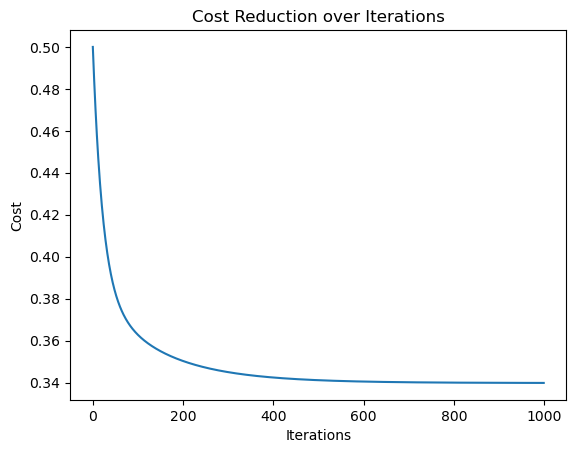

In [110]:
plt.plot(range(num_iters), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Reduction over Iterations')
plt.show()